# `Limpieza de la Data`

> 📌 En este archivo vamos a ver la limpieza de datos o en otras palabras, transformo los datos necesarios de forma que sea fácil de filtrar,  realizar procesos estadísticos y visualmente se entienda la información dentro de la misma DATA. 

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# -----------------------------------------------------------------------------
from scipy.stats import chi2_contingency, ttest_ind, shapiro, kstest, poisson, chisquare, expon

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


| `Nombre columna English`         | `En Español`                        |
|--------------------------------|-----------------------------------|
| Loyalty Number                 | Número de fidelización            |
| Year                           | Año                               |
| Month                          | Mes                               |
| Flights Booked                 | Vuelos Reservados                 |
| Flights with Companions        | Vuelos con acompañantes           |
| Total Flights                  | Total de vuelos                   |
| Distance                       | Distanciarse                      |
| Points Accumulated             | Puntos acumulados                 |
| Points Redeemed                | Puntos canjeados                  |
| Dollar Cost Points Redeemed    | Puntos de costo en dólares canjeados |
| Country                        | País                    |
| Province                       | Provincia               |
| City                           | Ciudad                  |
| Postal Code                    | Código Postal           |
| Gender                         | Género                  |
| Education                      | Educación               |
| Salary                         | Salario                 |
| Marital Status                 | Estado Civil            |
| Loyalty Card                   | Tarjeta de Lealtad      |
| CLV                            | Valor del Cliente (CLV) |
| Enrollment Type                | Tipo de Inscripción     |
| Enrollment Year                | Año de Inscripción      |
| Enrollment Month               | Mes de Inscripción      |
| Cancellation Year              | Año de Cancelación      |
| Cancellation Month             | Mes de Cancelación      |


In [2]:
df_union = pd.read_csv('DF_sin_duplicados.csv')
df_union.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
326167,454718,2018,8,16,6,22,1782,178.0,0,0,Canada,British Columbia,Whistler,V6T 1Y8,Female,Master,81000.0,Divorced,Star,2611.15,Standard,2014,3,NaN,NaN
23882,481048,2017,2,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2T 2J6,Female,Bachelor,94455.0,Married,Star,8295.84,Standard,2014,7,NaN,NaN
251905,981691,2018,3,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,51896.0,Married,Nova,20492.74,Standard,2017,5,NaN,NaN
275873,465570,2018,5,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Female,Bachelor,94908.0,Married,Nova,4335.35,Standard,2012,11,NaN,NaN
100337,328173,2018,10,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,NaN,Single,Aurora,5247.85,Standard,2013,3,2018.0,7.0
40805,486831,2017,3,4,2,6,3138,313.0,0,0,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,99788.0,Married,Nova,20096.89,Standard,2013,6,NaN,NaN
365475,750922,2018,10,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,70454.0,Married,Star,4964.63,Standard,2013,4,2013.0,10.0
337616,166953,2018,9,7,1,8,2328,232.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,75827.0,Married,Nova,3939.01,Standard,2017,2,NaN,NaN
217041,918341,2018,1,4,0,4,324,32.0,0,0,Canada,Ontario,Kingston,M9K 2P4,Male,College,NaN,Divorced,Star,2659.71,Standard,2012,7,NaN,NaN
360151,461012,2018,9,14,7,21,1806,180.0,597,48,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,78224.0,Married,Star,3280.46,Standard,2016,11,NaN,NaN


### --> Cambiar los valores negativos de la columna `Salary`

> 📌 Durante el análisis exploratorio, se observó que la columna contiene valores negativos. Es necesario corregir estos valores a positivos, ya que son cruciales para obtener datos estadísticos precisos. Mantenerlos negativos sería un error significativo para el informe.

In [3]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_union.select_dtypes(include=['number']).columns

# Encontrar las columnas que tienen valores negativos
negative_values = (df_union[numeric_columns] < 0).any()

# Mostrar las columnas que contienen valores negativos
columns_with_negatives = negative_values[negative_values].index.tolist()
print(f"Columns with negative values: {columns_with_negatives}")

# Si quieres ver las filas que contienen valores negativos en las columnas identificadas
rows_with_negatives = df_union[df_union[columns_with_negatives].lt(0).any(axis=1)]
rows_with_negatives


Columns with negative values: ['Salary']


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
291,115505,2017,1,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
956,152016,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
1716,194065,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN
2081,212128,2017,1,3,0,3,1959,195.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,-49001.0,Married,Nova,3130.68,2018 Promotion,2018,2,NaN,NaN
2433,232755,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398813,734647,2018,12,15,0,15,1440,144.0,0,0,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,-46303.0,Married,Nova,11280.73,2018 Promotion,2018,4,NaN,NaN
399884,790475,2018,12,7,1,8,1056,105.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,-34079.0,Married,Nova,12913.50,2018 Promotion,2018,2,NaN,NaN
402017,906428,2018,12,13,0,13,2912,291.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
402459,430398,2018,12,5,5,10,660,66.0,539,44,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN


In [4]:
df_union['Salary'] = df_union['Salary'].abs()

In [5]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_union.select_dtypes(include=['number']).columns

# Encontrar las columnas que tienen valores negativos
negative_values = (df_union[numeric_columns] < 0).any()

# Mostrar las columnas que contienen valores negativos
columns_with_negatives = negative_values[negative_values].index.tolist()
print(f"Columns with negative values: {columns_with_negatives}")


Columns with negative values: []


### --> Eliminar columnas

> 📌 Se eliminan estas dos columnas `Cancellation Year` y `Cancellation Month`, porque presentan un 80% de valores nulos y no son útiles para el análisis final.

In [6]:
df_union.drop(["Cancellation Year", "Cancellation Month"], axis=1, inplace=True )

### --> Agrego a los títulos de las columnas un guion y quito el espacio porque puedo evitar errores al usarlas

In [7]:
df_union.columns = df_union.columns.str.replace(" ", "_")
df_union.sample(1)

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month
276459,496014,2018,5,2,2,4,780,78.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,85038.0,Married,Aurora,6521.37,Standard,2012,8


### --> Cambio los meses de los años que estaban en números a texto como tal, para ser leídos fácilmente.

In [8]:
# Diccionario para cambiar los números de los meses a sus nombres en letras

month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

df_union['Month'] = df_union['Month'].map(month_map)

df_union.sample(5)


,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month
85625,187010,2017,June,0,0,0,0,0.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Married,Star,4692.17,2018 Promotion,2018,3
317097,866995,2018,July,0,0,0,0,0.0,0,0,Canada,Alberta,Banff,T4V 1D4,Female,Bachelor,76706.0,Single,Star,10388.55,Standard,2017,11
69565,227008,2017,May,15,0,15,2535,253.0,0,0,Canada,Ontario,Thunder Bay,K8T 5M5,Male,College,NaN,Single,Star,4665.25,Standard,2013,8
88805,356558,2017,June,5,0,5,4675,467.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Male,College,NaN,Married,Star,2676.95,Standard,2013,3
175991,520163,2017,November,5,0,5,1745,174.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,87603.0,Married,Star,3548.15,Standard,2016,11


In [10]:

# EXPLORAR LOS DATAFRAME EN GENERAL 

def exploracion_datos(df):
    print(' Filas y Columnas del DATAFRAME \n')
    print(f"El número de filas que tenemos es de {df.shape[0]}.\nEl número de columnas es de {df.shape[1]}\n")
    print('____________________________________________________________\n')
    
    print(' Nombre de todas las Columnas del DATAFRAME: \n')
    print(df.columns)
    print('____________________________________________________________\n')
    
    print('INFORMACIÓN GENERAL DEL DATAFRAME \n')
    print(df.info())
    print('____________________________________________________________\n')
    
    print('Ver los NULOS del DataFrame \n')
    print(f'Nulos de todo el data: --> {df.isnull().sum().mean() * 100} \n')
    for columna in df.columns:
        cantidad_valores_nulos = df[columna].isnull().mean() * 100
        print(f'La columna {columna}: {cantidad_valores_nulos}')
    print('____________________________________________________________\n')
    
    print('Valores ÚNICOS por columna:\n')
    for columna in df.columns:
        cantidad_valores_unicos = df[columna].unique()
        print(f'La columna {columna}: {len(cantidad_valores_unicos)}')
        print(f'La columna {columna}: {cantidad_valores_unicos}')
        
    print('____________________________________________________________\n')
    
    print('Valores DUPLICADOS por columna es de:\n')
    for columna in df.columns:
        cantidad_duplicados = df[columna].duplicated().sum()
        print(f'La columna {columna}: {cantidad_duplicados}')
    print('____________________________________________________________\n')
  
    print('--> RESUMEN ESTADÍSTICO \n')
    print('<<< Variables Numéricas >>> \n')
    print(df.describe().T)
    print('<<< Variables Categóricas >>> \n')
    print(df.describe(include='object').T)
   

In [11]:
exploracion_datos(df_union)

 Filas y Columnas del DATAFRAME 

El número de filas que tenemos es de 403760.
El número de columnas es de 23

____________________________________________________________

 Nombre de todas las Columnas del DATAFRAME: 

Index(['Loyalty_Number', 'Year', 'Month', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed',
       'Country', 'Province', 'City', 'Postal_Code', 'Gender', 'Education',
       'Salary', 'Marital_Status', 'Loyalty_Card', 'CLV', 'Enrollment_Type',
       'Enrollment_Year', 'Enrollment_Month'],
      dtype='object')
____________________________________________________________

INFORMACIÓN GENERAL DEL DATAFRAME 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty_Number          

In [65]:
df_union.shape

(403760, 23)

### Tratamiento de los Nulos/Vacios

> 📌 -> La columna `Salary` presenta un 25% de valores nulos/vacios, por lo que es necesario estructurarlos adecuadamente para el análisis. Para completar estos valores, se utilizará la mediana, que se extrae de la misma.

In [12]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos = df_union[df_union.columns[df_union.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos)

Las columnas numéricas que tienen nulos son : 
 
Index(['Salary'], dtype='object')


In [13]:
df_union.Salary.sample(10)

170878    58421.0
206135    51978.0
381168    82905.0
29492     57984.0
134728    57311.0
140700    59847.0
39537     89051.0
150190        NaN
207198    53189.0
287863        NaN
Name: Salary, dtype: float64

In [14]:
def metricas_estadisticas(df, columna):
    # Calcular la mediana de la columna
    mediana = df[columna].median()
    # Calcular la media de la columna
    media = df[columna].mean()
    # Calcular el porcentaje de valores nulos en la columna
    porcentaje_nulos = df[columna].isnull().mean() * 100
    
    # Imprimir los resultados
    print(f"Columna: {columna}")
    print(f"Mediana: {mediana}")
    print(f"Media: {media}")
    print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")
    
    return

In [15]:
# Llamar a la función para la columna 'salary'
nulos_salary = metricas_estadisticas(df_union, 'Salary')
nulos_salary

Columna: Salary
Mediana: 73479.0
Media: 79371.73290215588
Porcentaje de valores nulos: 25.33%


> 📌 Aquí presentamos la gráfica, la cual muestra los valores atípicos dentro de la columna para proporcionar una demostración más clara y visual de los datos.

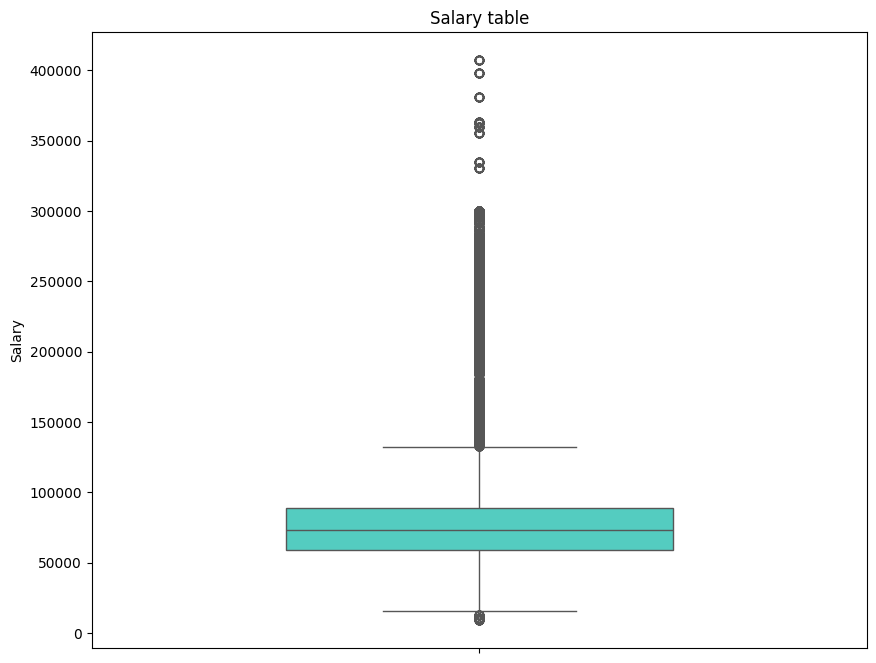

In [20]:
# Crear el subplot con el número de gráficas deseadas en su interior
fig, ax = plt.subplots(figsize=(10, 8))

# Añadir un boxplot usando el método 'sns.boxplot()'
sns.boxplot(y="Salary", 
            data=df_union, 
            width=0.5, 
            color="turquoise", 
            ax=ax)

# Añadir título y etiquetas para mayor claridad
ax.set_title('Salary table')
ax.set_ylabel('Salary')

# Mostrar la gráfica
plt.show()


In [21]:

mediana_salary = df_union["Salary"].median()
print(f"La mediana de la columna 'Salary' es: {round(mediana_salary, 2)}")


La mediana de la columna 'Salary' es: 73479.0


In [22]:
# aplicamos el método 'fillna()' a la columna
df_union["Salary"] = df_union["Salary"].fillna(mediana_salary)

# comprobamos los nulos para la columna
print(f"Después del 'fillna' tenemos {df_union['Salary'].isnull().sum()} nulos")

Después del 'fillna' tenemos 0 nulos


In [96]:
# Guarda el DataFrame como un archivo CSV
df_union.to_csv("DF_DATA#3.csv", index = False)

In [23]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty_Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  object 
 3   Flights_Booked               403760 non-null  int64  
 4   Flights_with_Companions      403760 non-null  int64  
 5   Total_Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points_Accumulated           403760 non-null  float64
 8   Points_Redeemed              403760 non-null  int64  
 9   Dollar_Cost_Points_Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 